# Pandas and NumPy by Example

## Quick Intro:

### What?

The "Scientific Python" stack (SciPy) is a suite of libraries for scientific and numerical computing in Python. The key components are:

1. **NumPy** - Array processing and linear algebra primitives
2. **SciPy** - The MATLAB of Python. High level interfaces for scientific computing (optimization, statistics, etc...)
3. **Pandas** - The R of Python. Data processing and basic analysis
4. **Matplotlib** - Plotting and visualization
5. **SymPy** - Symbolic math

### Why?

SciPy pretty much emulates the functionality to MATLAB and R - so why should we both using it? 

MATLAB and R were developed decades ago by statisticians for prototyping new algorithms. They're great if you want to do a bunch of linear algebra, but...

1. Serious implementation inefficiencies - data copying
2. Clunky programming model - Support for OOP is weak, lots of arcane restrictions
3. Lack of support for data structures - hash maps? queues? stacks?
4. Limited capabilities outside of numerical computing

In a nutshell: Python is a serious programming language with diverse applications. It provides hands down the best potential to integrate numerical computing with other applications. E.g. Web server based on Flask can easily run NumPy code.

### Key Programming Concepts

**Vectorize your code!**

In [1]:
import os
import multiprocessing as mp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Pandas Basics

* All Pandas data structures are built on top of NumPy arrays.
* The core data structure in Pandas is the `DataFrame`.
* A Pandas `DataFrame` is a 2-D array of heterogeneously typed data - basically just like an SQL table.
* The columns of a dataframe represent measured variables. The rows represent observations (measurements) of those variables.
* A `DataFrame` is typically constructed by reading from an external data source. Pandas provides a robust suite of IO tools which support reading from many common data exchange formats: CSV files, HDF5, Apache Parquet, SQL Database, and many more! See the IO [documentation](https://pandas.pydata.org/pandas-docs/stable/io.html) for more information.

In [2]:
# Here we'll read data from a CSV file. Note that Pandas can uncompress on the fly.
# Note as well that we specify the data type for one column by hand to prevent it from being
# interpreted as a float. 'O' = 'Object' = String
air = pd.read_csv('air_quality.csv.gz', sep=';', thousands='.', decimal=',', dtype={'Time': 'O'})

In [3]:
# Let's see what we just read in:
print air.head()  # prints the first few rows of data

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

In [4]:
print air.dtypes  # prints the NumPy storage type for each column

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object


In [5]:
print air.describe()  # prints summary statistics about each numeric column

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

In [6]:
# There are two columns which contain entirely missing values
# Let's drop them.

not_all_null = air.count() > 0
air = air.loc[:,not_all_null]  # using a boolean mask to extract a subset of columns
print air.head()

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.786

In [7]:
# For simplicity, we can also just keep the "ground truth" values used to calibrate the sensors
cols_to_drop = filter(lambda x: 'PT08' in x, air.columns)
air = air.drop(cols_to_drop, axis='columns')
print air.head()

         Date      Time  CO(GT)  NMHC(GT)  C6H6(GT)  NOx(GT)  NO2(GT)     T  \
0  10/03/2004  18.00.00     2.6     150.0      11.9    166.0    113.0  13.6   
1  10/03/2004  19.00.00     2.0     112.0       9.4    103.0     92.0  13.3   
2  10/03/2004  20.00.00     2.2      88.0       9.0    131.0    114.0  11.9   
3  10/03/2004  21.00.00     2.2      80.0       9.2    172.0    122.0  11.0   
4  10/03/2004  22.00.00     1.6      51.0       6.5    131.0    116.0  11.2   

     RH      AH  
0  48.9  0.7578  
1  47.7  0.7255  
2  54.0  0.7502  
3  60.0  0.7867  
4  59.6  0.7888  


In [8]:
# Our dataset is a time series - that is several variables observed repeatedly over time
# Right now the "Date" and "Time" variables are are stored as Python strings.
# This isn't very useful so let's convert them to a type Pandas can understand

# First let's concatenate the 'Date' and 'Time' strings into a single vector which
# Pandas can parse into dates.

# We can use the syntax `dataframe[column_name]` to extract a single column from a dataframe
# An individual column is a `Series` object which represents a vector

# String columns have a `.str` attribute which exposes text processing methods.
# See: http://pandas.pydata.org/pandas-docs/stable/text.html for more detail

datetime = air['Date'].str.cat(air['Time'].str.replace('.',':'), sep=' ')
print datetime.head()

0    10/03/2004 18:00:00
1    10/03/2004 19:00:00
2    10/03/2004 20:00:00
3    10/03/2004 21:00:00
4    10/03/2004 22:00:00
Name: Date, dtype: object


In [9]:
# We can use the same syntax `dataframe[new_column_name]` to add a column to a DataFrame
# We use the `to_datetime()` function to convert the string date into a timestamp that Pandas can understand.

# We can instruct Pandas how to parse dates using the standard Python strftime directives

# See: https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
# for more detail on how Python parses dates

air['timestamp'] = pd.to_datetime(datetime, format='%d/%m/%Y %H:%M:%S')
print air['timestamp'].head()

0   2004-03-10 18:00:00
1   2004-03-10 19:00:00
2   2004-03-10 20:00:00
3   2004-03-10 21:00:00
4   2004-03-10 22:00:00
Name: timestamp, dtype: datetime64[ns]


## Indexes

Indexes are an important concept in Pandas. An index represents a label for the observations in a `DataFrame` or `Series`. Indexes provide an efficient, intuitive, way to extract subsets of data. 

**Indexes enforce consistency of data**

Every data frame should have a "primary key," or set of non-null variables which uniquely identify an observation. Enforcing a primary key helps avoid confusion about the contents of data. Consider the following example (from [here](https://web.stanford.edu/~gentzkow/research/CodeAndData.pdf)):

|state_abbrv|county_code|county_pop|
|:---------:|:---------:|:--------:|
|CA|30982|132,982|
|CA|20985|12,287|
|CA|30982|132,287|
|CA|NULL|1,498,287|

This table contains several red flags: first `county_code = 30982` appears twice but with different populations. Which one is correct? If this is a dataset about conties, what does it mean for a county to be `NULL`? If we select `{state_abbrv,county_code}` as our primary key and ask Pandas to check that it uniquely identifies observations these issues will be flagged for us. Otherwise, we could unwittingly feed invalid data into our statistical model. 

Let's see some examples. 

In our case, each observation is uniquely identified by a time stamp. The `timestamp` variable is a natural way to index our data. Note that, in general, indexes do not need to be unique.

In [10]:
# First we tell Pandas which column we want to use as an index
air = air.set_index('timestamp', verify_integrity=True)  # verify integrity asserts that the index is unique

/home/ahthomas/miniconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:1582: FutureWarning: In the future, 'NAT == x' and 'x == NAT' will always be False.
  counter[k] += 1


ValueError: Index has duplicate keys: DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

In [11]:
# But wait! Timestamp is not unique! Since this is a time-series what does a duplicate time value mean?
# We need to address this issue before continuing with our analysis...

# The error message is telling us that there were multiple dates which could not be parsed.
# Let's look at these observations:

print air.loc[air['timestamp'].isnull(),:].head()

     Date Time  CO(GT)  NMHC(GT)  C6H6(GT)  NOx(GT)  NO2(GT)   T  RH  AH  \
9357  NaN  NaN     NaN       NaN       NaN      NaN      NaN NaN NaN NaN   
9358  NaN  NaN     NaN       NaN       NaN      NaN      NaN NaN NaN NaN   
9359  NaN  NaN     NaN       NaN       NaN      NaN      NaN NaN NaN NaN   
9360  NaN  NaN     NaN       NaN       NaN      NaN      NaN NaN NaN NaN   
9361  NaN  NaN     NaN       NaN       NaN      NaN      NaN NaN NaN NaN   

     timestamp  
9357       NaT  
9358       NaT  
9359       NaT  
9360       NaT  
9361       NaT  


In [12]:
# So these were just cases in which all data was missing. Let's just drop these rows.
air = air.loc[np.logical_not(air['timestamp'].isnull()),:]

In [13]:
# Now we can use `timestamp' as a valid index
air = air.set_index('timestamp', verify_integrity=True)
print air.index

DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name=u'timestamp', length=9357, freq=None)


In [14]:
# Now we can drop the redundant columns to save memory
cols_to_drop = ['Date','Time']
air = air.drop(cols_to_drop, axis='columns')

In [15]:
# The index provides a convenient way to slice observations
air = air.sort_index()
print air.loc['2004-03-01':'2004-03-10','CO(GT)'].head()

timestamp
2004-03-10 18:00:00    2.6
2004-03-10 19:00:00    2.0
2004-03-10 20:00:00    2.2
2004-03-10 21:00:00    2.2
2004-03-10 22:00:00    1.6
Name: CO(GT), dtype: float64


In [16]:
print air.loc['2004-03-01':'2004-03-10','CO(GT)'].tail()

timestamp
2004-03-10 19:00:00    2.0
2004-03-10 20:00:00    2.2
2004-03-10 21:00:00    2.2
2004-03-10 22:00:00    1.6
2004-03-10 23:00:00    1.2
Name: CO(GT), dtype: float64


## Visualization

One of the big strengths of Pandas is its robust support for plotting and visualization through Matplotlib. Let's look at some examples of Pandas visualization capabilities.

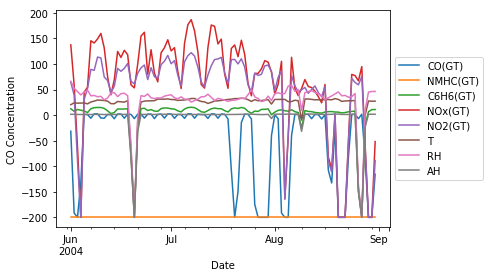

In [17]:
# We'll plot CO2 concentration during the month of January
# We can use the "resample" method to aggregate data to the daily level

ax = air.loc['2004-06-01':'2004-08-31',:].resample('D').mean().plot(legend=False, ax=None)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
ax.set_xlabel('Date')
ax.set_ylabel(r'CO Concentration')
plt.show()

## Grouping and Aggregation

It's very common to need to compute summary values by some grouping variable. Pandas provides the `groupby()` method which functions similarly to the `GROUP BY` clause in SQL. We'll look at a simple example of Pandas groupby to do missing value imputation. For a more exhaustive description of what you can do with groupby see the Pandas guide ([link](https://pandas.pydata.org/pandas-docs/stable/groupby.html)).

In [18]:
# Just for fun let's pretend our sensor punked out sometimes and we needed to
# impute the missing values. We simulate random 10% missing data
# and then impute these values at their conditional mean given month
# and hour of day

air.loc[np.random.rand(air.shape[0],1).ravel() > 0.9,:] = np.nan

air['month'] = air.index.map(lambda x: x.month)
air['hour'] = air.index.map(lambda x: x.hour)
mean_values = air.groupby(['month','hour']).mean()  # There are lots of other groupby methods (e.g. sum, var, etc...)

# Now we'll create a full time series using the imputed mean values...
# Note the use of the 'join' method to zip the two dataframes by their index

all_dates = pd.date_range(air.index.min(), air.index.max(), freq='H')
ts = pd.DataFrame(data={'timestamp': all_dates,
                        'month': all_dates.map(lambda x: x.month),
                        'hour': all_dates.map(lambda x: x.hour)}
                 ).set_index(
                     'timestamp'
                 ).join(
                     mean_values, on=['month','hour'], how='inner'
                 ).sort_index()

print mean_values.head()

               CO(GT)  NMHC(GT)   C6H6(GT)     NOx(GT)     NO2(GT)          T  \
month hour                                                                      
1     0    -19.079310    -200.0 -21.627586  268.758621  114.000000 -21.234483   
      1    -26.141379    -200.0 -15.817241  225.586207  111.758621 -14.106897   
      2     -6.188889    -200.0 -10.703704  196.037037   99.481481  -8.440741   
      3    -28.574074    -200.0  -3.877778 -200.000000 -200.000000  -1.429630   
      4    -73.462963    -200.0  -4.525926  123.481481   73.555556  -1.596296   

                   RH         AH  
month hour                        
1     0     24.675862 -27.028638  
      1     33.582759 -20.105614  
      2     43.055556 -14.209789  
      3     53.337037  -6.805652  
      4     52.081481  -6.823448  


In [19]:
# we can also iterate through groups operating on them independently.
# This is a good way to "chunk" a dataset which is sometimes useful
# for parallel processing. Here's an example of computing group medians
# in parallel. This is also a nice example of how easy parallel processing
# is in Python.

def worker_fn(group):
    # the objects returned by a groupby iterator
    # consist of tuple of (name, data)
    name, data = group
    return (name, data['CO(GT)'].quantile())

p = mp.Pool(2)  # creates a thread pool containing two workers
quantiles = p.map(worker_fn, air.loc[:,['month','CO(GT)']].groupby('month'))
p.close()

print quantiles

[(1, 1.6), (2, 1.7), (3, 1.8), (4, 1.1), (5, 1.4), (6, 1.6), (7, 1.1), (8, 0.8), (9, 1.4), (10, 0.8), (11, 2.2), (12, 2.1)]


In [20]:
# Now we can use our imputed values to replace missing data
air = air.join(ts, how='right', rsuffix='_imputed')

In [21]:
names = filter(lambda x: '_imputed' in x, air.columns)
names = filter(lambda x: 'hour' not in x and 'month' not in x, names)
for n in names:
    bn = n.replace('_imputed','')
    air.loc[:,bn] = air.loc[:,bn].fillna(air[n])
air = air.loc[:,map(lambda x: x.replace('_imputed',''), names)]

In [22]:
# Now that we have our nice data set 
# let's export it to NumPy so we can do something with it!
air.to_csv('clean_air_data.csv')